## What factor's affect the  Characteristics of Borrower's APR 
### BY Muluneh

### Investigation Overview
<p>In this investigation, I wanted to look at the factors affects the borrower APR and lone outcome status. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income.</p>

### Dataset Overview
<p>The dataset consisted of borrower APRs,lone status and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. unnecessory date is removed from the analysis due to very large stated monthly income seemed as outliers and missing borrower APR information.</p>

In [116]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype as pdi
%matplotlib inline
# Uploade the dataset
df_lone = pd.read_csv('prosperLoanData.csv')
# Choose some columns from the dataset
columns_list = ['ListingCreationDate','Term','LoanStatus','StatedMonthlyIncome','ClosedDate','BorrowerAPR','BorrowerRate','ProsperRating (numeric)','ProsperRating (Alpha)','Occupation','ProsperScore','EmploymentStatus','CreditScoreRangeLower','CreditScoreRangeUpper','IncomeRange','DebtToIncomeRatio','ScorexChangeAtTimeOfListing','LoanOriginalAmount','LoanOriginationQuarter','TotalInquiries','MonthlyLoanPayment','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']
# create a new dataframe with selected datasets
df_new = df_lone[columns_list]
# data wrangling, remove loans with missing borrower APR information
df_new = df_new[~df_new.BorrowerAPR.isna()]
df_new = df_new[df_new.StatedMonthlyIncome<=30000]
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
class_var = pdi(ordered = True,categories = rate_order)
employee_class = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
class_var = pdi(ordered = True,categories = employee_class )
df_new['EmploymentStatus'] = df_new['EmploymentStatus'].astype(ordered_var)
df_new.shape

(113585, 24)

In [118]:
# dispaly few data
df_new.head()

,ListingCreationDate,Term,LoanStatus,StatedMonthlyIncome,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),Occupation,...,IncomeRange,DebtToIncomeRatio,ScorexChangeAtTimeOfListing,LoanOriginalAmount,LoanOriginationQuarter,TotalInquiries,MonthlyLoanPayment,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,3083.333333,2009-08-14 00:00:00,0.16516,0.1580,NaN,NaN,Other,...,"$25,000-49,999",0.17,NaN,9425,Q3 2007,3.0,330.43,0,0.0,258
1,2014-02-27 08:28:07.900000000,36,Current,6125.000000,NaN,0.12016,0.0920,6.0,A,Professional,...,"$50,000-74,999",0.18,NaN,10000,Q1 2014,5.0,318.93,0,0.0,1
2,2007-01-05 15:00:47.090000000,36,Completed,2083.333333,2009-12-17 00:00:00,0.28269,0.2750,NaN,NaN,Other,...,Not displayed,0.06,NaN,3001,Q1 2007,1.0,123.32,0,0.0,41
3,2012-10-22 11:02:35.010000000,36,Current,2875.000000,NaN,0.12528,0.0974,6.0,A,Skilled Labor,...,"$25,000-49,999",0.15,NaN,10000,Q4 2012,1.0,321.45,0,0.0,158
4,2013-09-14 18:38:39.097000000,36,Current,9583.333333,NaN,0.24614,0.2085,3.0,D,Executive,...,"$100,000+",0.26,NaN,15000,Q3 2013,9.0,563.97,0,0.0,20


## Distribution of Loan Original  Amount

<p>The very large spikes in frequency are at 5k, 15k, 10k, 20k and 55k respectively. There are also small spikes at 30k and 35k etc. It means that most of the loans are multiples of 5k.</p>

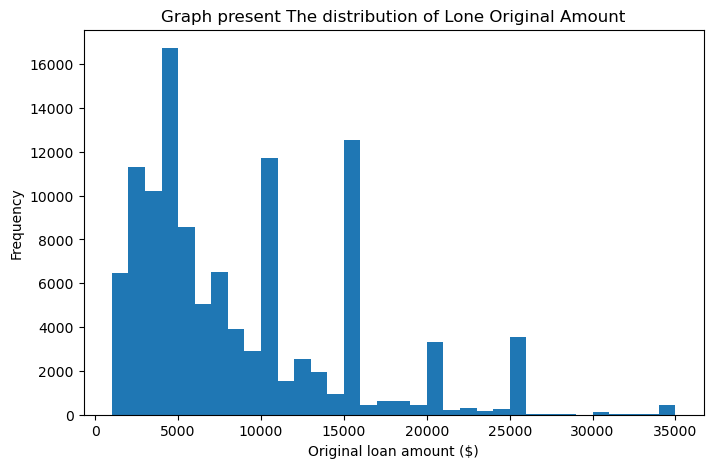

In [69]:
bins = np.arange(1000, df_new.LoanOriginalAmount.max()+1000, 1000)
plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original loan amount ($)')
plt.ylabel('Frequency')
plt.title("Graph present The distribution of Lone Original Amount");

## Distribution of Borrower APR


<p>The distribution of borrower APR looks left skewed. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.</p>

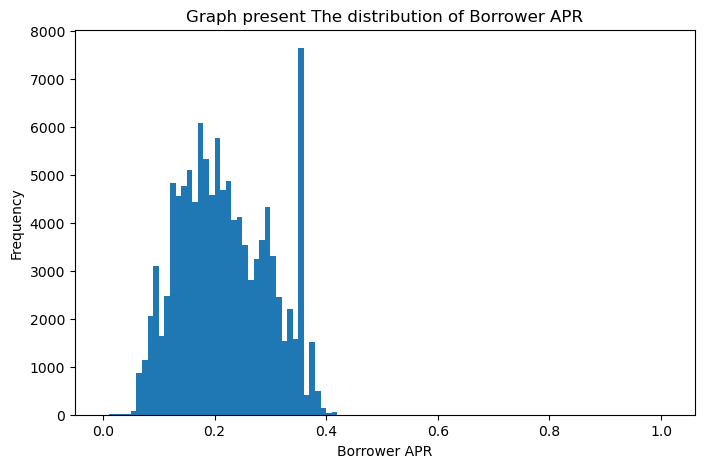

In [68]:
bins = np.arange(0,df_new['BorrowerAPR'].max()+0.5,0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Borrower APR");

## Borrower APR vs. Loan Original Amount

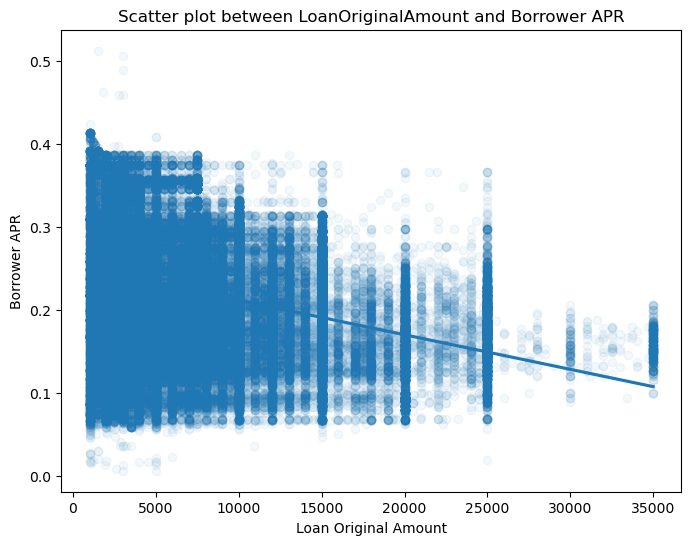

In [74]:
plt.figure(figsize = [8, 6])
sns.regplot(data=df_new,x="LoanOriginalAmount",y="BorrowerAPR",scatter_kws={"alpha":1/20},x_jitter=0.3);
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower APR");
plt.title("Scatter plot between LoanOriginalAmount and Borrower APR");

## Borrower APR vs. Prosper Rating

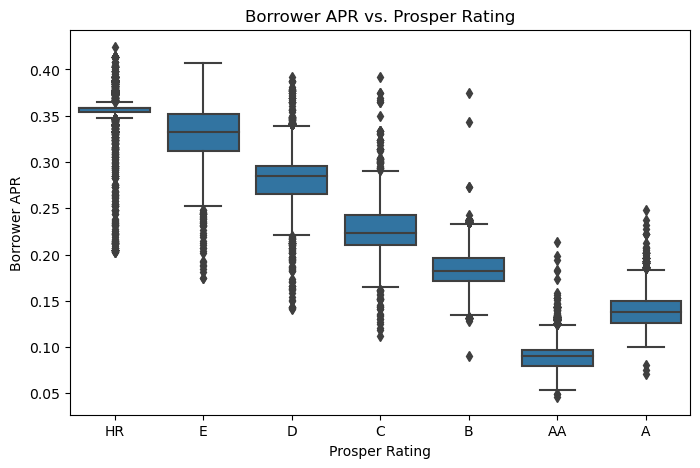

In [96]:
plt.figure(figsize=[8,5])
base_color = sns.color_palette()[0]
my_order = df_new.groupby(by=["ProsperRating (Alpha)"])["BorrowerAPR"].median().iloc[::-1].index
sns.boxplot(data=df_new, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color,order=my_order)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');


### Prosper Rating Effect on Relationship between APR and Loan Amount
<p>The loan amount increases(with lower borrower APR) with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative relation with negative slope  to slightly positive when the Prosper ratings are increased from HR to B or better. This is may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.</p>

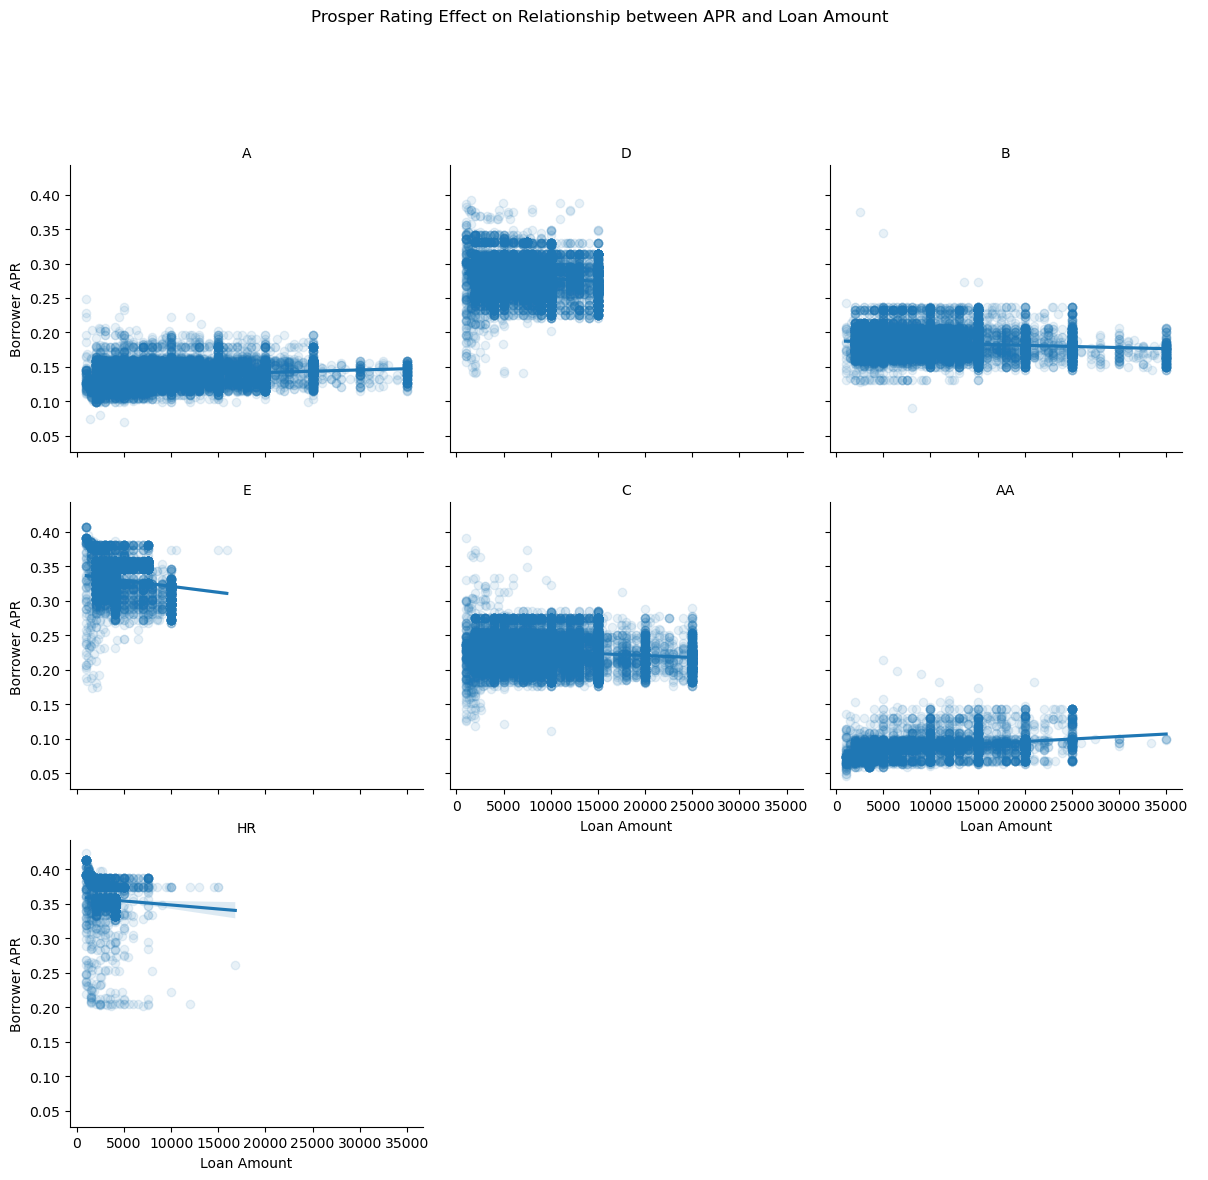

In [101]:
g=sns.FacetGrid(data=df_new,col='ProsperRating (Alpha)', height=4, col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between APR and Loan Amount');
plt.subplots_adjust(top=0.85)

## Borrower APR by Rating and Term

<p>Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-AA raings.</p>

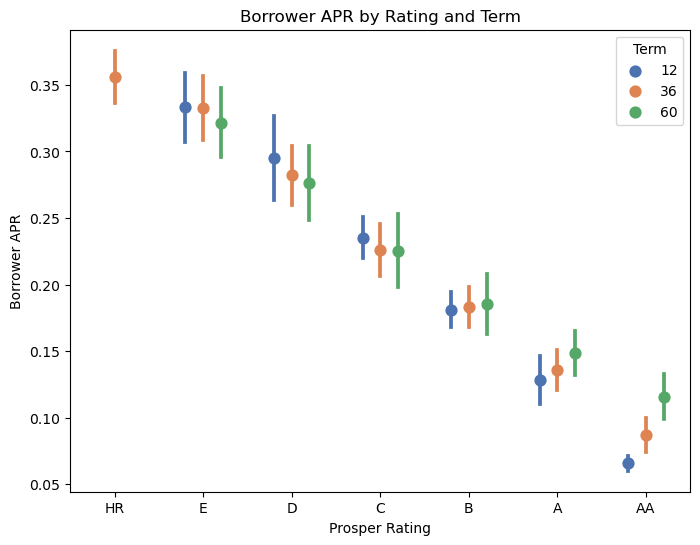

In [114]:
fig = plt.figure(figsize = [8,6])
base_color = sns.color_palette()[0]
sns.pointplot(data = df_new, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR',order = ['HR','E','D','C','B','A','AA'], hue = 'Term',palette = 'deep', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Rating and Term')
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term');